# Proyecto 1 | Inteligencia Artificial
## Integrantes:
- **César Jiménez Salazar** - 2021052709
- **Maynor Martínez Hernández** - 2021052792
- **Fernanda Murillo Mena** - 2021077803

## Descripción
Este proyecto tiene como objetivo principal aplicar diversas técnicas de clasificación de datos aplicados para dos conjuntos de datos, esto permite explorar diversas herramientas relacionadas al Machine Learning, y contribuir al desarrollo del conocimiento a partir de la investigación. Se utilizarán los modelos KNN, regresión lineal y redes neuronales con el fin de analizar ambos conjuntos de datos.

## Conjunto de datos
1. **Pima Indians Diabetes Database**
    - **URL:** https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
    - **Descripción:** Este conjunto de datos proviene del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene diabetes o no, basándose en ciertas mediciones de diagnóstico incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de edad de ascendencia india Pima.
2. **Heart Failure Prediction Dataset** <br>
   Este fue el dataset elegido por el equipo de trabajo debido a que fue el dataset relacionado a salud con una cantidad de features adecuada y el más parecido al primer dataset dado por el profesor en cuanto al tamaño de samples. 
    - **URL:** https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
    - **Descripción:** Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial y se estima que cobran 17,9 millones de vidas cada año, lo que representa el 31% de todas las muertes en todo el mundo. Cuatro de cada cinco muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en mujeres menores de 70 años. La insuficiencia cardíaca es un evento común causado por enfermedades cardiovasculares y este conjunto de datos contiene 11 características que pueden usarse para predecir una posible enfermedad cardíaca. Las mujeres con enfermedades cardiovasculares o que tienen un alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedades ya establecidas) necesitan una detección y un tratamiento precoz en el que un modelo de aprendizaje automático puede ser de gran ayuda.

## Pima Indians Diabetes Database
Inicialmente, se procede con la exploración y el preprocesamiento de datos para el conjunto de datos *Pima Indians Diabetes Database*. Dicho dataset fue dado por el profesor del curso.

### Analisis Exploratorio de Datos
Primero, se importan las librerías necesarias para el análisis exploratorio de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ahora, se procede a cargar los datos del dataset. Del mismo modo, se comienza a explorar el conjunto de datos para obtener la información básica importante. Para lograr esto, se visualizan algunos datos para poder ver las columnas y los datos correspondientes, se obtienen las estadísticas básicas, la cantidad de datos faltantes y la correlación entre columnas.

In [2]:
# Load dataset
df_diabetes = pd.read_csv('diabetes.csv')

# Display 20 rows 
print(df_diabetes.head(20))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

In [3]:
# Get basic statistics 
print(df_diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [4]:
# Number of missing values in each column
print(df_diabetes.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Correlation between columns
print(df_diabetes.corr())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [6]:
df_diabetes.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

Con esta información, se obtiene que el dataset posee 9 columnas de las cuales *pregnancies* tiene la posibilidad de tener un 0 sin que sea un problema para el análisis, esto porque una mujer puede tener 0 embarazos. Además, la columna *outcome* tiene un valor binario por lo que también puede tener un valor 0. Se evidencia que el dataset tiene una cantidad de 768 datos y que no hay datos nulos o faltantes.

Ahora, se procede a revisar si hay filas duplicadas para eliminarlas. Del mismo modo, tras el análisis anterior se pudo notar que algunas columnas (además de las permitidas) poseen valores en 0 por lo que es de suma importancia corregirlo para el análisis del dataset con los modelos más adelante. 

Una técnica utilizada para tratar con valores faltantes en un conjunto de datos es la **_imputación de datos_**. El objetivo de la imputación es reemplazar los datos faltantes con valores sustitutos para permitir el análisis sin descartar *features* por la falta de algunos valores. Usar la media como valor de imputación es apropiado porque representa el punto central de la distribución y minimiza la distorsión.

Por este motivo, se decidió recurrir a la *imputación de datos por la media*, es decir, reemplazar los valores en 0 encontrados en todas las columnas excepto *pregnancies* y *outcome* por la media correspondiente a la columna.

In [7]:
# Check for duplicate rows and remove them
print(df_diabetes.duplicated().sum())
df_diabetes = df_diabetes.drop_duplicates()

0


In [4]:
# Check for missing values for 0 in columns except for the 'Pregnancies' column and 'Outcome' column and replace them with the mean of the respective column
df_diabetes['Glucose'] = df_diabetes['Glucose'].replace(0, np.nan)
df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].replace(0, np.nan)
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].replace(0, np.nan)
df_diabetes['Insulin'] = df_diabetes['Insulin'].replace(0, np.nan)
df_diabetes['BMI'] = df_diabetes['BMI'].replace(0, np.nan)
df_diabetes['DiabetesPedigreeFunction'] = df_diabetes['DiabetesPedigreeFunction'].replace(0, np.nan)
df_diabetes['Age'] = df_diabetes['Age'].replace(0, np.nan)
df_diabetes.fillna(df_diabetes.mean(), inplace=True)

Debido a que no habían filas duplicadas, no se eliminó nada. Tras el cambio del dataset realizado con la imputación por la media, se puede proceder a analizar mediante el uso de diversos diagramas para ver el comportamiento del dataset de manera visual.

El siguiente histograma permitirá ver el rango de edades que se encuentran dentro del conjunto de datos, esto con el fin de obtener una idea general de los datos obtenidos.

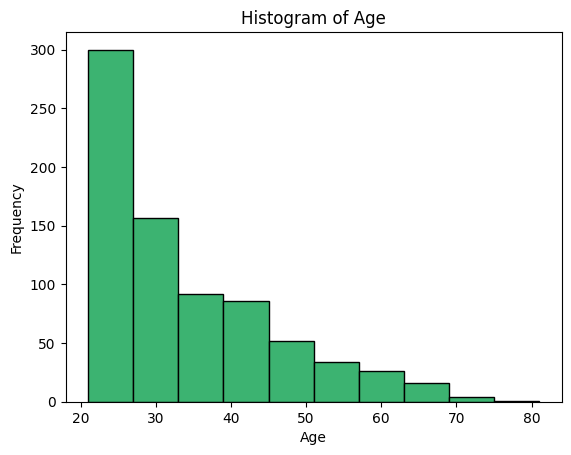

In [9]:
# Histogram of the Age column
plt.hist(df_diabetes['Age'], bins=10, color='#3CB371', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Con la información obtenida se evidencia que la mayoría de mujeres se encuentra en un rango de edad entre 20 y 30 años. Ahora, se procede con un análisis un poco más profundo. Se desea observar el porcentaje y la cantidad de mujeres diabéticas en comparación con las mujeres que no lo padecen.

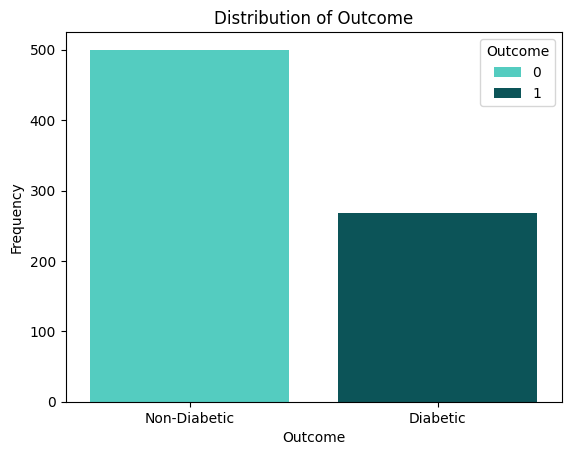

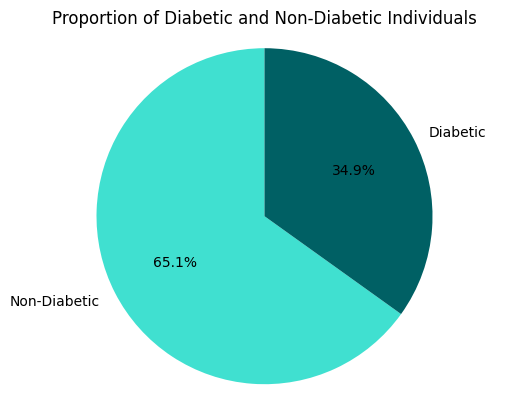

In [10]:
# Distribution of the Outcome column for people with diabetes and people without diabetes
palette_colors = {0: "#40E0D0", 1: "#006064"}  
sns.countplot(x='Outcome', data=df_diabetes, hue="Outcome", palette=palette_colors)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

# Pie chart to visualize the proportion of diabetic and non-diabetic individuals
labels = ['Non-Diabetic', 'Diabetic']
sizes = df_diabetes['Outcome'].value_counts()
colors = ['#40E0D0', '#006064']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Diabetic and Non-Diabetic Individuals')
plt.axis('equal')
plt.show()

Con base en los resultados obtenidos, se puede ver que existe una mayor cantidad de mujeres que no padecen de diabetes en el conjunto de datos con un 65.1% de los 768 datos existentes. A demás, es importante ver que en el *pie chart* el dataset no está balanceado.

Ahora, para obtener una idea de como están relacionados los *features* con el hecho de que una mujer sea diabética o no, se pretende comparar cada columna con la columna de *outcome*. Para agilizar este proceso, primero se creó una función que recibe el dataset, el arreglo de *features* con la cual se pretende comparar y la columna con la que se va a comparar.

In [12]:
def plot_stacked_grid_histogram(df, features, split_column):
    num_features = len(features)
    colors = ['#40E0D0', '#006064']
    
    num_rows = (num_features + 2) // 3  
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows)) 

    if num_rows > 1:
        axes = axes.flatten()
    
    for i, feature in enumerate(features):
        ax = axes[i] if num_rows > 1 else axes
        if feature in df.columns and split_column in df.columns:
            ax.hist([df[df[split_column] == 0][feature], df[df[split_column] == 1][feature]], 
                    bins=10, stacked=True, color=colors, 
                    label=[f'Not {split_column}', f'{split_column}'], edgecolor='black')
            ax.set_title(f'{feature} by {split_column}')
            ax.set_xlabel(feature)
            ax.set_ylabel('Count')
            ax.legend()
        else:
            print(f"The feature '{feature}' or the split column '{split_column}' is not in the DataFrame.")
    for i in range(num_features, num_rows * 3):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()  
    plt.show()

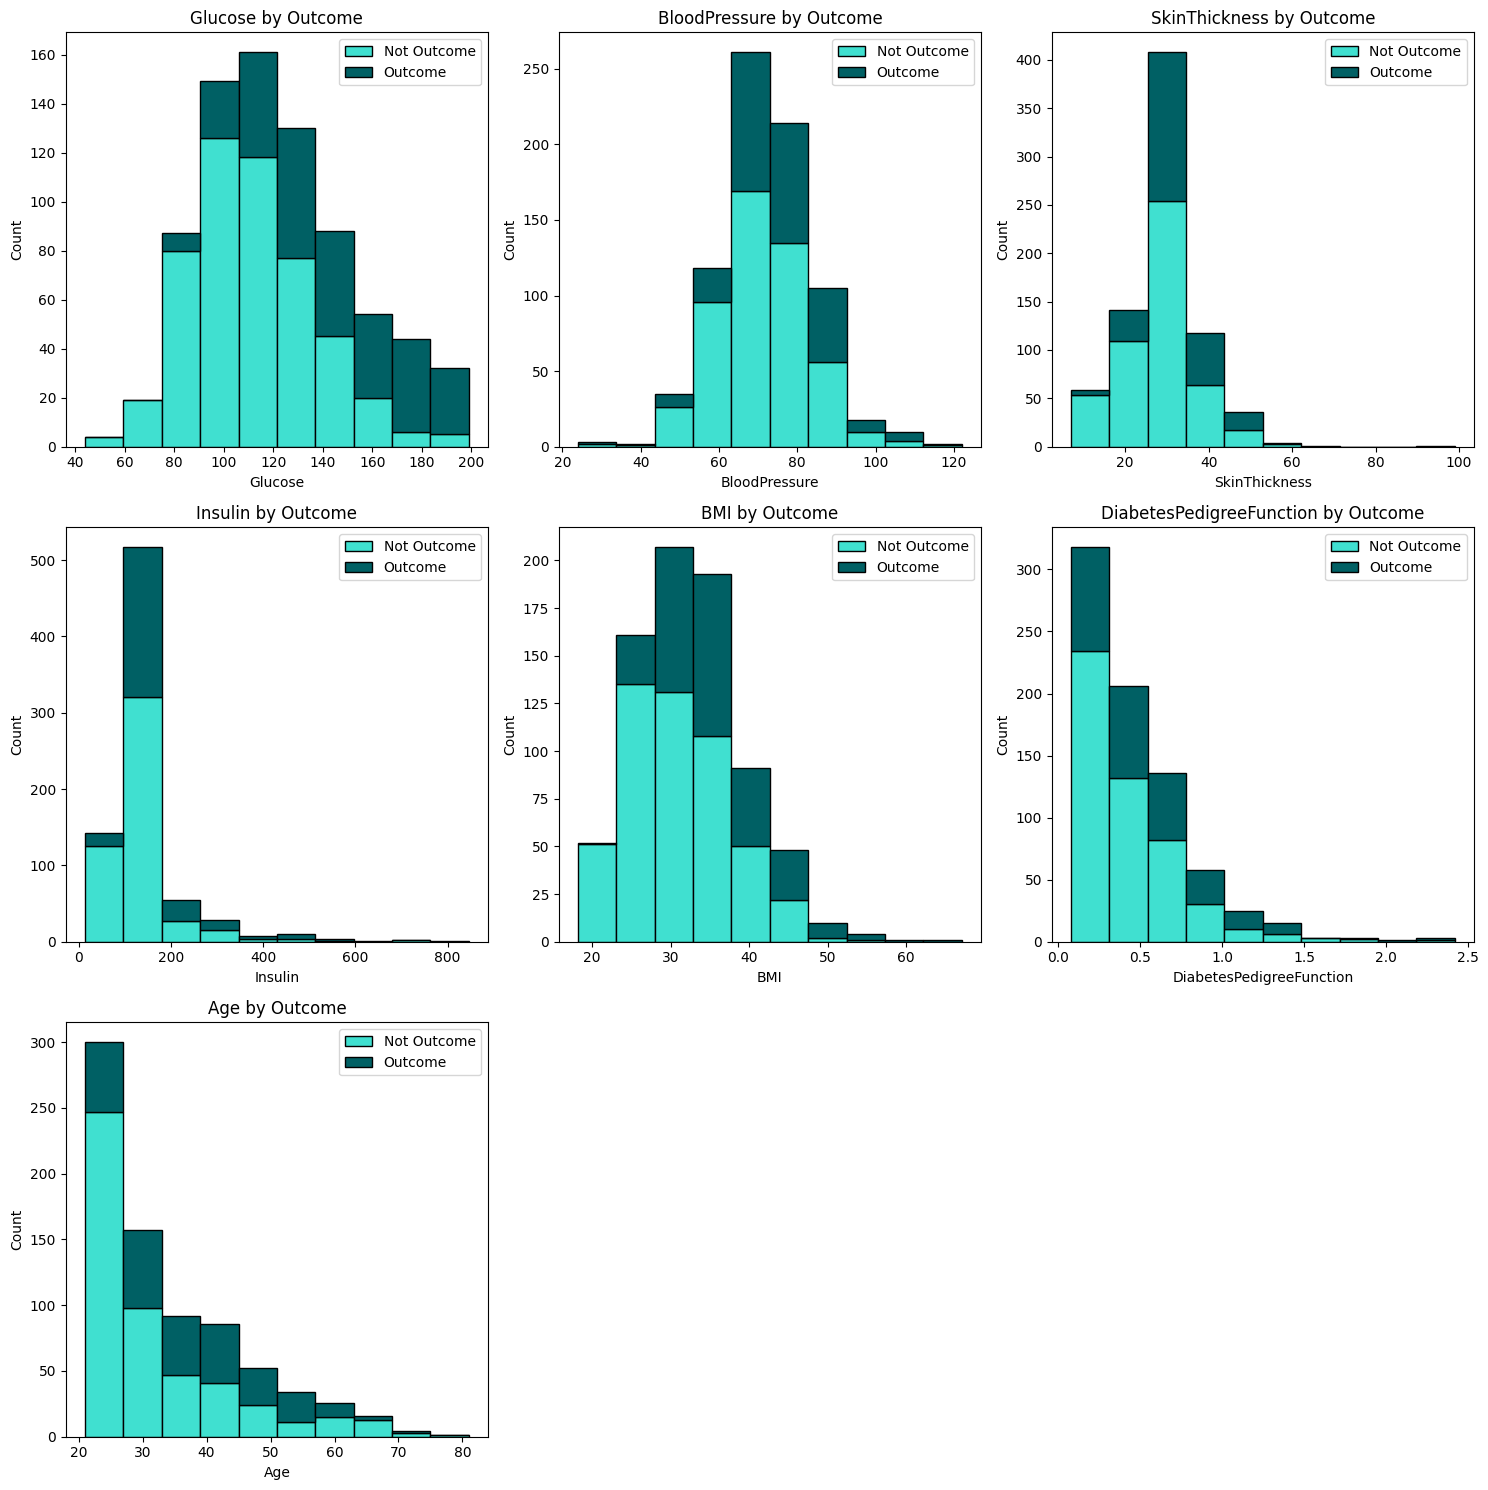

In [13]:
# Call the function to plot the stacked histograms
plot_stacked_grid_histogram(df_diabetes, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 'Outcome')

Con base en los histogramas obtenidos, es fácil de observar que en su mayoría para cualquier feature donde están los valores altos es donde hay más concentración de mujeres diabéticas. Es importante ver que no es tan significativo en algunos casos como lo es la presión sanguínea.

Ahora, para observar que tan relacionada está la edad con estos datos vistos anteriormente, se pretende evaluar de manera similar cada columna en comparación de la edad para ver las diabéticas y las no diabéticas. Para este caso se recurrió al uso de diagramas de dispersión. Se seguió una técnica para agilizar el proceso similar al anterior donde se crea una función que luego se llama con el nombre del *dataset*, el arreglo de *features* a evaluar, las columnas a comparar y los *labels*.

In [14]:
def scatter_plots_grid_by_feature_and_split(df, features, split_column, y_column, labels):
    num_features = len(features)
    colors = ['#40E0D0', '#006064']

    num_rows = (num_features + 2) // 3  

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  
    axes_flattened = axes.flatten() if num_rows > 1 else [axes]

    for i, feature in enumerate(features):
        ax = axes_flattened[i]
        for idx, outcome in enumerate(sorted(df[split_column].unique())):
            subset = df[df[split_column] == outcome]
            ax.scatter(subset[feature], subset[y_column], c=colors[idx], label=labels[idx], alpha=0.6)

        ax.set_title(f'{feature} vs {y_column}')
        ax.set_xlabel(feature)
        ax.set_ylabel(y_column)
        if i == 0:  
            ax.legend()

    for i in range(num_features, num_rows * 3):
        fig.delaxes(axes_flattened[i])

    plt.tight_layout()  
    plt.show()

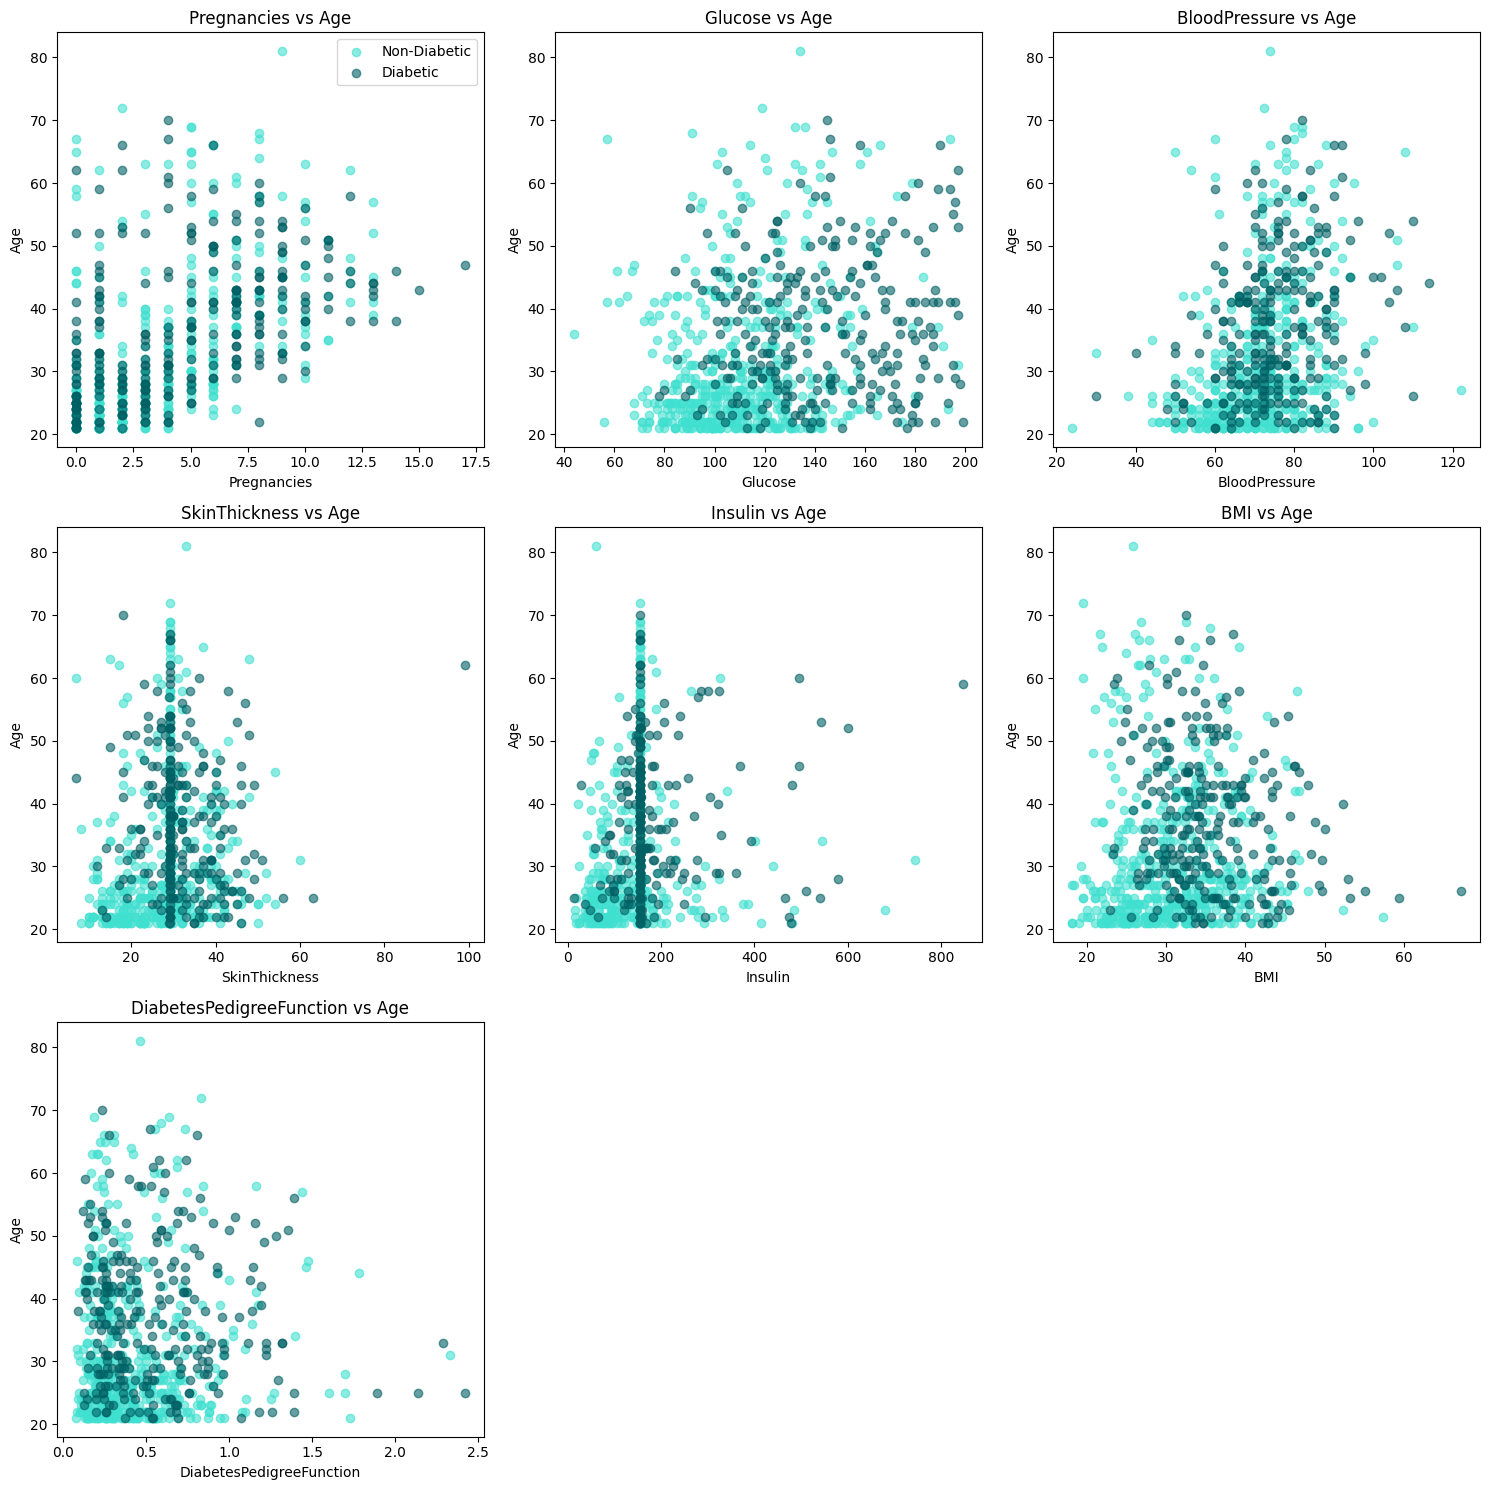

In [15]:
labels = ['Non-Diabetic', 'Diabetic']
scatter_plots_grid_by_feature_and_split(df_diabetes, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'], 'Outcome', 'Age', labels)

Con los resultados obtenidos, se muestra que las mujeresd diabéticas tienden a estar entre los valores más bajos en cuantos a edad. Los datos están más concentrados en las edades bajas en todos los *features* sólo en algunos casos como los embarazos o nuevamente la prsión sanguíonea tienen más disperción de datos.

Con esto se concluye con el análisis del primer dataset. 

### Preprocesamiento de datos
En esta sección se procede a realizar el preprocesamiento de datos para el dataset *Pima Indians Diabetes Database*. Que consiste en separar el set de datos en training (80%) y testing (20%).

In [5]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
random_seed = 20

# Split the dataframe into training and testing sets
train_df, test_df = train_test_split(df_diabetes, test_size=0.2, random_state=random_seed)

# Print the shapes of the training and testing sets
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


Training set shape: (614, 9)
Testing set shape: (154, 9)


## Heart Failure Prediction Dataset
Seguidamente, se procede con la exploración y el preprocesamiento de datos para el conjunto de datos *Heart Failure Prediction Dataset*. Dicho *dataset* fue elegido por el equipo de trabajo cómo el segundo conjunto de datos a analizar. Al inicio del notebook se explicó el motivo de su elección, en el informe se ampliará más en detalle dicho motivo.

### Analisis Exploratorio de Datos
Primero, se importan las librerías necesarias para el análisis exploratorio de datos.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ahora, se procede a cargar los datos del nuevo *dataset*. Del mismo modo, se comienza a explorar el conjunto de datos para obtener la información básica importante. Para lograr esto, se visualizan algunos datos para poder ver las columnas y los datos correspondientes, se obtienen las estadísticas básicas, la cantidad de datos faltantes y la correlación entre columnas.

In [20]:
# Load dataset
df_heart = pd.read_csv('heart.csv')

# Display 20 rows
print(df_heart.head(20))

    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    40   M           ATA        140          289          0     Normal   
1    49   F           NAP        160          180          0     Normal   
2    37   M           ATA        130          283          0         ST   
3    48   F           ASY        138          214          0     Normal   
4    54   M           NAP        150          195          0     Normal   
5    39   M           NAP        120          339          0     Normal   
6    45   F           ATA        130          237          0     Normal   
7    54   M           ATA        110          208          0     Normal   
8    37   M           ASY        140          207          0     Normal   
9    48   F           ATA        120          284          0     Normal   
10   37   F           NAP        130          211          0     Normal   
11   58   M           ATA        136          164          0         ST   
12   39   M           ATA

In [21]:
# Get basic statistics 
print(df_heart.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [22]:
# Number of missing values in each column
print(df_heart.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [23]:
df_heart.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

Con esta información, se obtiene que el *dataset* posee 12 columnas de las cuales *FastingsBS*, *Oldpeak* y obviamente *HeartDisease* tienen la posibilidad de tener un 0 sin que sea un problema para el análisis. Adicionalmente, se evidencia que el dataset tiene una cantidad de 918 datos y que no hay datos nulos o faltantes.

Ahora, se procede a revisar si hay filas duplicadas para eliminarlas. Del mismo modo, tras el análisis anterior se pudo notar que la mayoría de las columnas posee un valor no numérico por lo que se procede a codificar cada una con el fin de obtener columnas con datos totalmente numéricos.

El *label encoding* es utilizado para transformar variables categóricas no numéricas en formatos numéricos para que puedan ser procesadas por algoritmos de machine learning. Cada etiqueta única de la categoría se asigna a un entero distinto. Esta técnica es particularmente útil para variables con un número limitado de categorías donde no se requiere la distinción de orden o prioridad entre las mismas.

Por esta razón, se implementó el *label encoding* para las columnas categóricas del conjunto de datos, con excepción de aquellas que son binarias o donde la relación ordinal es relevante. A continuación se explican las codificaciones: 
- Para las columnas *Sex* y *ExerciseAngina* se obtuvo una codificación binaria debido a que sólo tenían dos posibles valores.
  - *Sex* se utiliza **1** para M y **0** para F.
  - *ExerciseAngina* se utiliza **1** para Y y **0** para N.
- Para las columnas *ChestPainType*, *RestingECG* y *ST_Slope* se utilizó inicialmente la codificación de one-hot para evitar que se asuma un orden numérico entre las categorías, sin embargo, tras la consulta con el profesor se sugirió seguir el método anterior para estas columnas también. 
  - *ChestPainType* se utiliza **1** para ATA, **2** para NAP, **0** para ASY y **3** para TA
  - *RestingECG* se utiliza **1** para Normal, **2** para ST y **0** para LVH
  - *ST_Slope* se utiliza **1** para Flat, **2** para Up y **0** para Down

In [24]:
# Check for duplicate rows and remove them
print(df_heart.duplicated().sum())
df_heart = df_heart.drop_duplicates()

0


In [25]:
# Label codification 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_heart['Sex'] = le.fit_transform(df_heart['Sex'])
df_heart['ExerciseAngina'] = le.fit_transform(df_heart['ExerciseAngina'])
df_heart['ChestPainType'] = le.fit_transform(df_heart['ChestPainType'])
df_heart['RestingECG'] = le.fit_transform(df_heart['RestingECG'])
df_heart['ST_Slope'] = le.fit_transform(df_heart['ST_Slope'])

In [26]:
print(df_heart.head(20))

    Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    40    1              1        140          289          0           1   
1    49    0              2        160          180          0           1   
2    37    1              1        130          283          0           2   
3    48    0              0        138          214          0           1   
4    54    1              2        150          195          0           1   
5    39    1              2        120          339          0           1   
6    45    0              1        130          237          0           1   
7    54    1              1        110          208          0           1   
8    37    1              0        140          207          0           1   
9    48    0              1        120          284          0           1   
10   37    0              2        130          211          0           1   
11   58    1              1        136          164          0  

In [27]:
print(df_heart.tail(20))

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
898   35    1              1        122          192          0           1   
899   61    1              0        148          203          0           1   
900   58    1              0        114          318          0           2   
901   58    0              0        170          225          1           0   
902   58    1              1        125          220          0           1   
903   56    1              1        130          221          0           0   
904   56    1              1        120          240          0           1   
905   67    1              2        152          212          0           0   
906   55    0              1        132          342          0           1   
907   44    1              0        120          169          0           1   
908   63    1              0        140          187          0           0   
909   63    0              0        124          197

In [28]:
print(df_heart.corr())

                     Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000  0.055750      -0.077150   0.254399    -0.095282   
Sex             0.055750  1.000000      -0.126559   0.005133    -0.200092   
ChestPainType  -0.077150 -0.126559       1.000000  -0.020647     0.067880   
RestingBP       0.254399  0.005133      -0.020647   1.000000     0.100893   
Cholesterol    -0.095282 -0.200092       0.067880   0.100893     1.000000   
FastingBS       0.198039  0.120076      -0.073151   0.070193    -0.260974   
RestingECG     -0.007484  0.071552      -0.072537   0.022656    -0.196544   
MaxHR          -0.382045 -0.189186       0.289123  -0.112135     0.235792   
ExerciseAngina  0.215793  0.190664      -0.354727   0.155101    -0.034166   
Oldpeak         0.258612  0.105734      -0.177377   0.164803     0.050148   
ST_Slope       -0.268264 -0.150693       0.213521  -0.075162     0.111471   
HeartDisease    0.282039  0.305445      -0.386828   0.107589    -0.232741   

Debido a que no habían filas duplicadas, no se eliminó nada. Tras el cambio del dataset realizado con el método de *label encoding*, se puede proceder a analizar mediante el uso de diversos diagramas para ver el comportamiento del dataset de manera visual.

El siguiente histograma permitirá ver el rango de edades y sexo que se encuentran dentro del conjunto de datos, esto con el fin de obtener una idea general de los datos obtenidos.

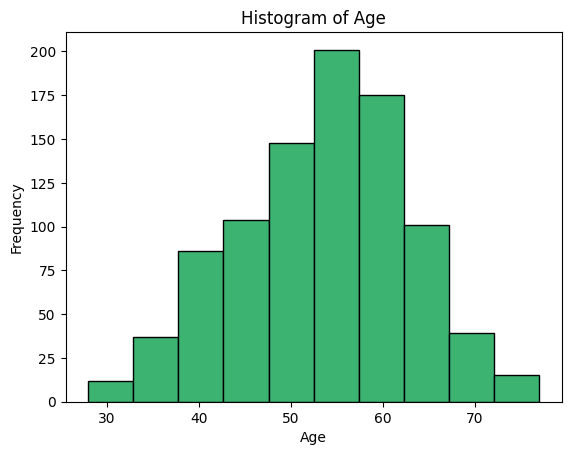

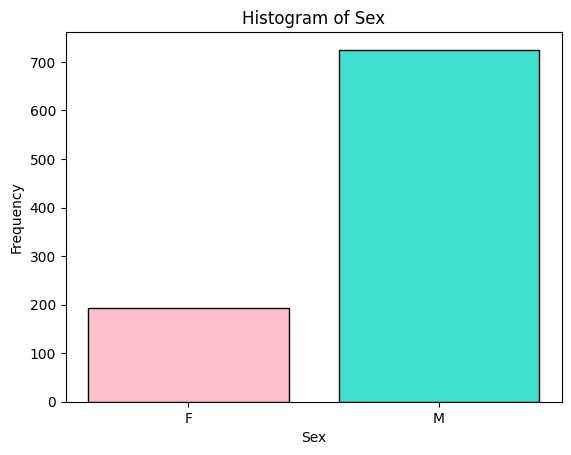

In [29]:
# Histogram of the Age column
plt.hist(df_heart['Age'], bins=10, color='#3CB371', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram of the Sex column
male_count = np.sum(df_heart['Sex'] == 1)
female_count = np.sum(df_heart['Sex'] == 0)
plt.bar(['F', 'M'], [female_count, male_count], color=['#FFC0CB', '#40E0D0'], edgecolor='black')  
plt.title('Histogram of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

Con los datos obtenidos, se evidencia que la mayoría de las personas se encuentran en un rango de edad entre 50 y 60 años, además que la mayoría son hombres.

Ahora, se procede con un análisis un poco más profundo. Se desea observar el porcentaje y la cantidad de personas que sí tienen una enfermedad cardiovascular en comparación con las personas que no lo tienen.

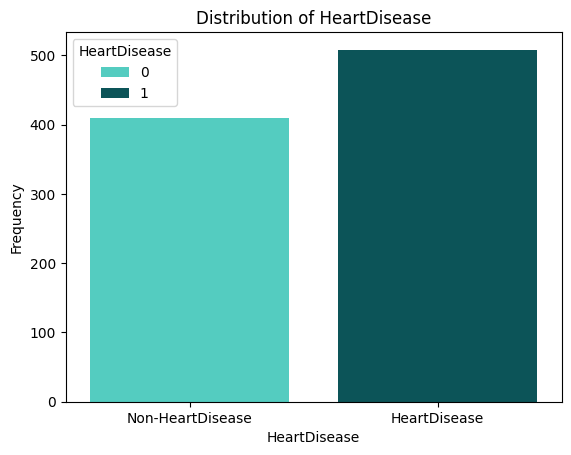

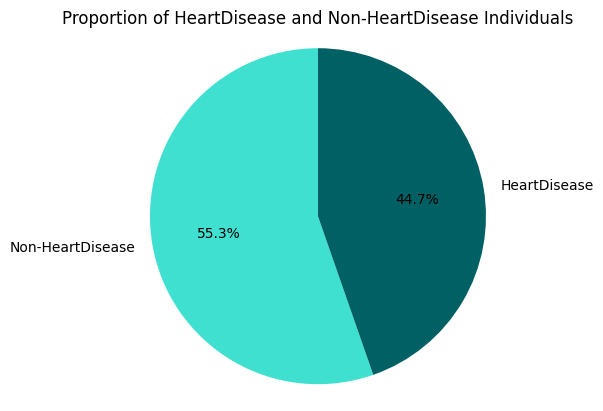

In [30]:
# Distribution of the HeartDisease column for people with a heart disease and people without a heart disease
palette_colors = {0: "#40E0D0", 1: "#006064"}  
sns.countplot(x='HeartDisease', data=df_heart, hue="HeartDisease", palette=palette_colors)
plt.title('Distribution of HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-HeartDisease', 'HeartDisease'])
plt.show()


# Pie chart to visualize the proportion of diabetic and non-diabetic individuals
labels = ['Non-HeartDisease', 'HeartDisease']
sizes = df_heart['HeartDisease'].value_counts()
colors = ['#40E0D0', '#006064']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of HeartDisease and Non-HeartDisease Individuals')
plt.axis('equal')
plt.show()

Con base en los resultados obtenidos, se puede ver que existe una mayor cantidad de persona que sí padecen de una enfermadad cardiovascular en el conjunto de datos con un 55.3% de los 918 datos existentes. Además, es importante destacar que este dataset sí se encuentra balanceado, no como el anterior.

Ahora, para obtener una idea de como están relacionados los *features* con el hecho de que una persona tenga una enfermadad cardiovascular o no, se pretende comparar cada columna con la columna de *HeartDisease*. Para agilizar este proceso, se utilizará la misma función `plot_stacked_histogram` usada en el primer *dataset*, el arreglo de *features* con la cual se pretende comparar y la columna con la que se comparará.

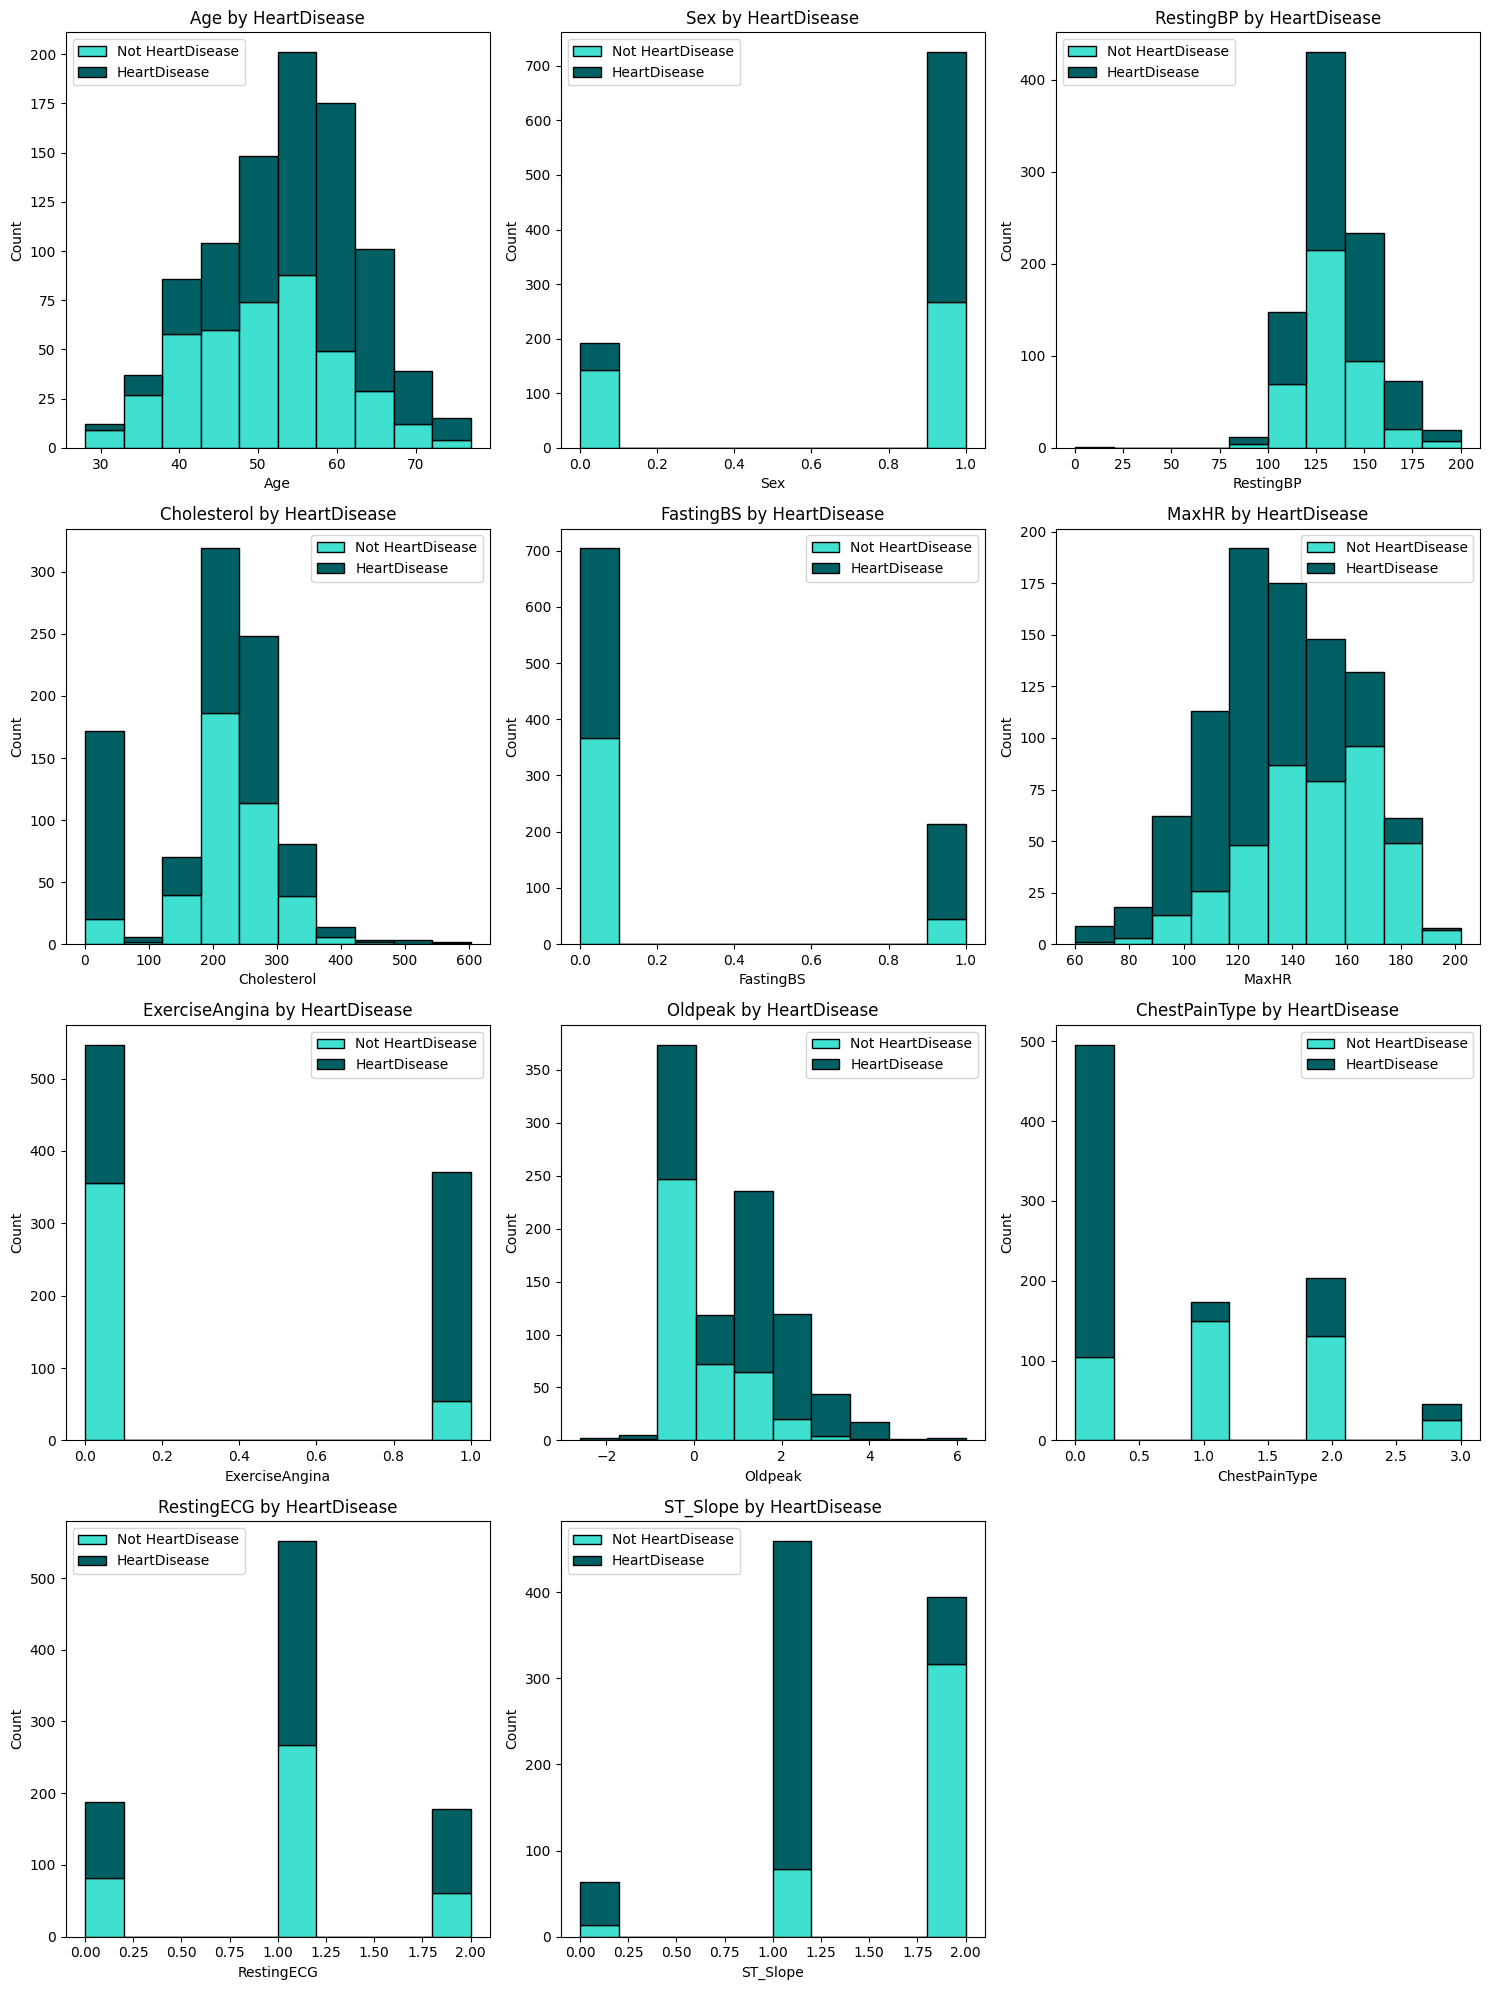

In [31]:
# Call the function to plot the stacked histograms
plot_stacked_grid_histogram(df_heart, ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
                                  'ChestPainType', 'RestingECG','ST_Slope'], 'HeartDisease')

Tras ejecutar esta función, se puede observar que en el *feature* *cholesterol* hay valores en 0 lo cual está incorrecto debido a que una persona no puede tener un colesterol en 0. Para corregir esto, se utilizará la misma solución usada para el primer dataset, es decir, la imputación de datos por la media. Posterior a esto, se volverá a ejecutar la función para ver los gráficos.

In [32]:
df_heart['Cholesterol'] = df_heart['Cholesterol'].replace(0, np.nan)
df_heart.fillna(df_heart.mean(), inplace=True)

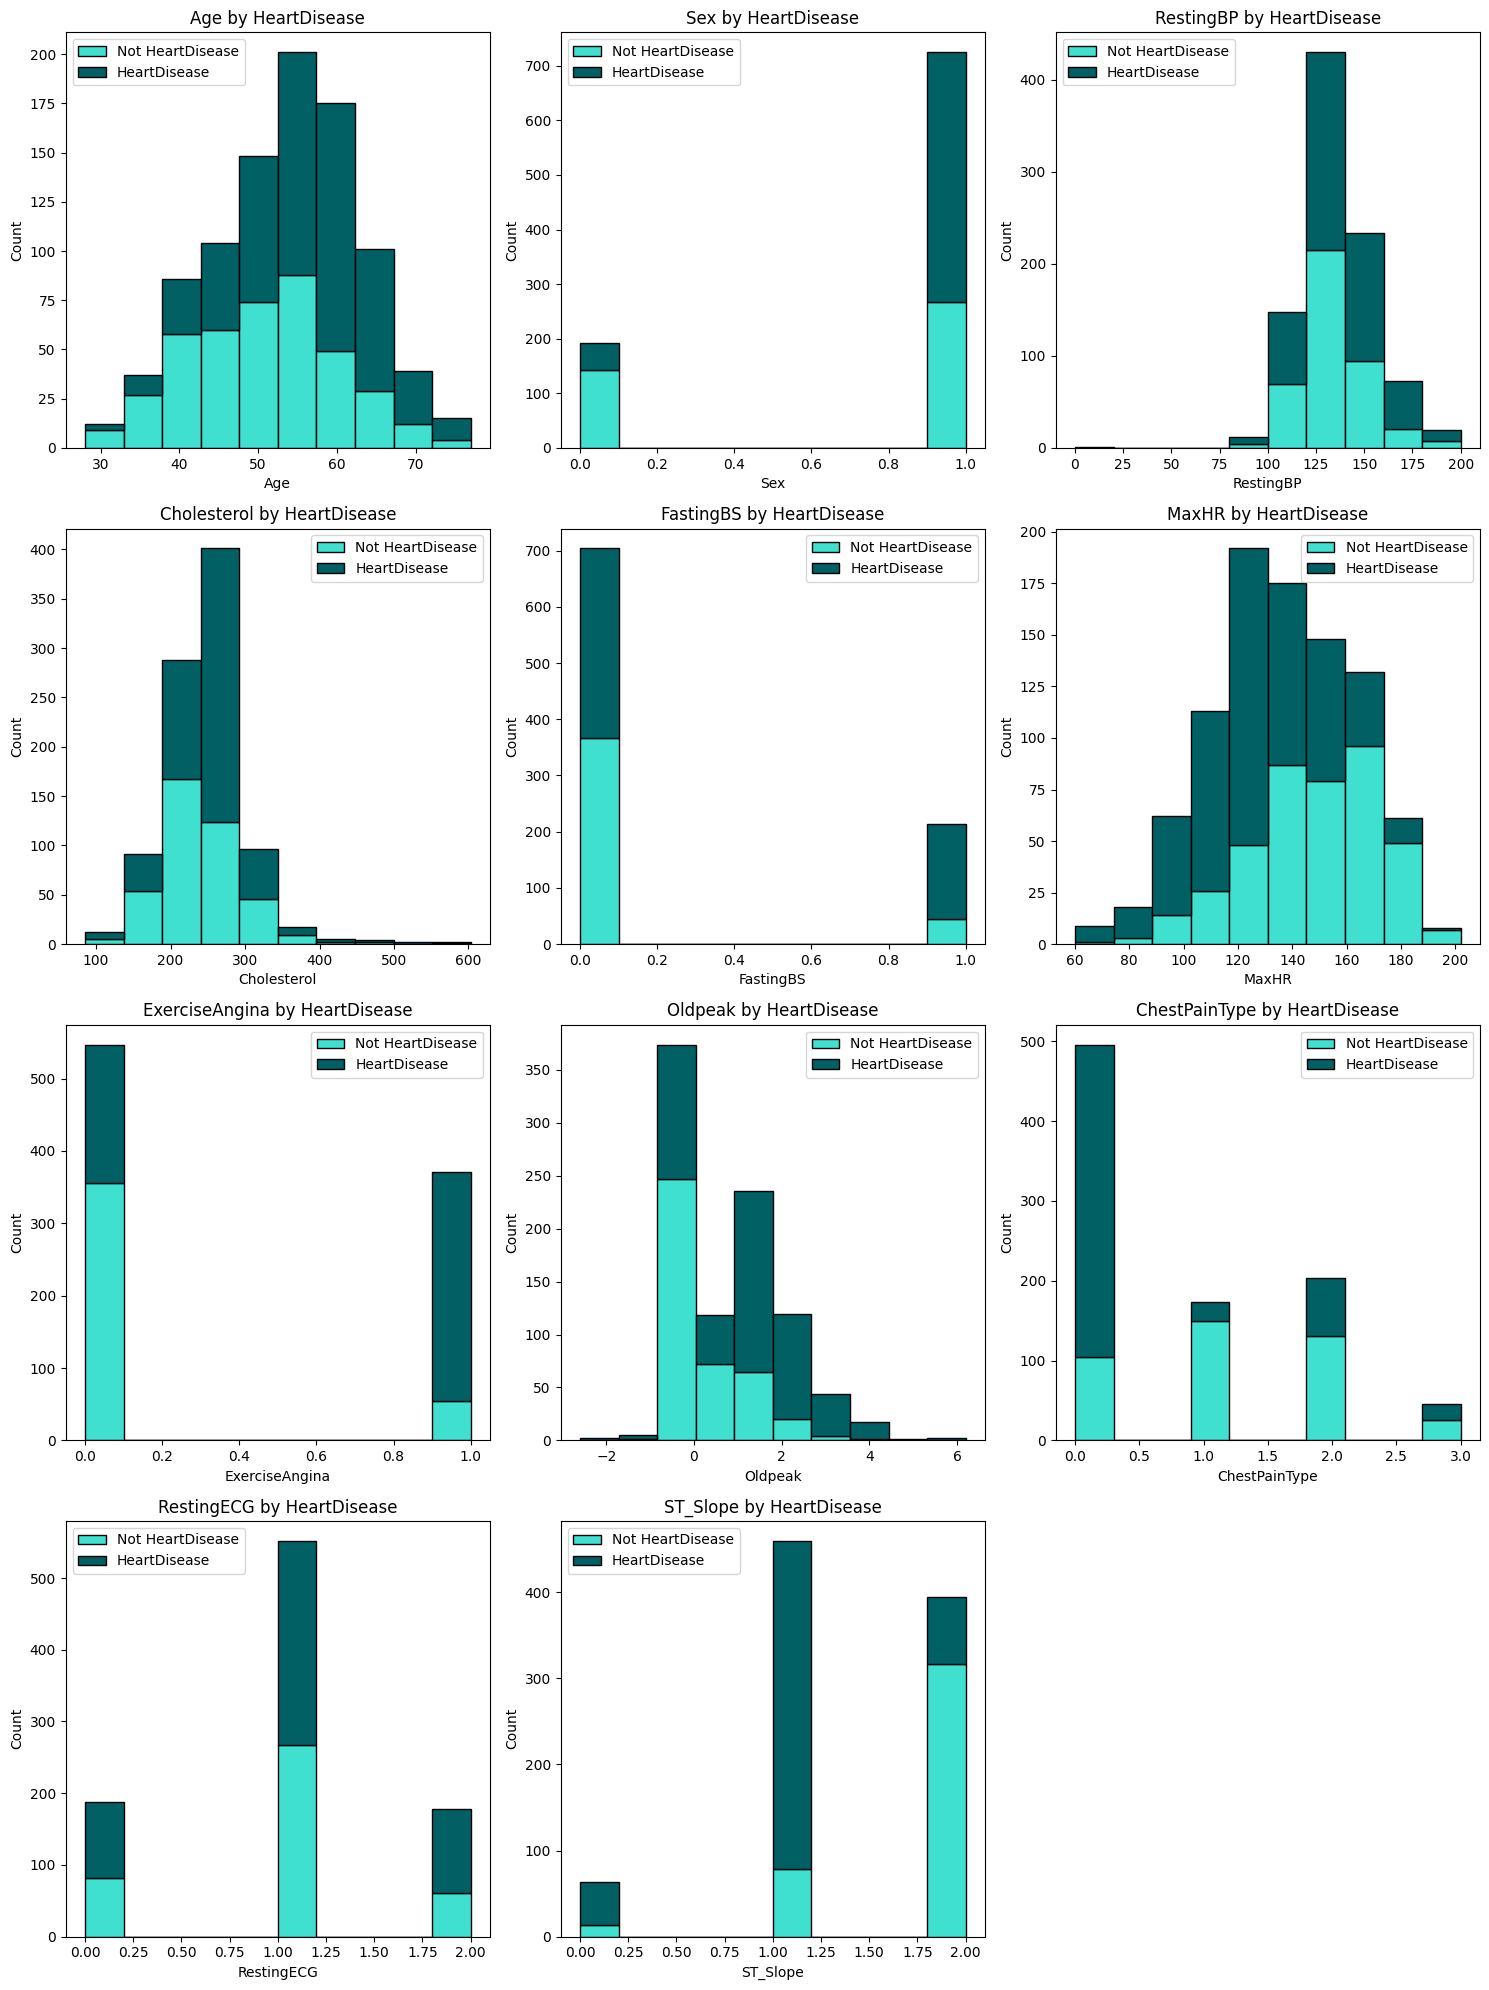

In [33]:
# Call the function to plot the stacked histograms
plot_stacked_grid_histogram(df_heart, ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
                                  'ChestPainType', 'RestingECG','ST_Slope'], 'HeartDisease')

Con base en los histogramas obtenidos, es fácil de observar que en su mayoría para cualquier feature donde están los valores altos es donde hay más concentración de personas con enfermedades cardiovasculares. Es importante ver que no es tan significativo en algunos casos como lo es con el *MaxHR*, *Cholesterol* e inclusive la edad. Del mismo modo, se puede ver que para las personas con enfermedades cardiovasculares, el *ChestPainType* es significativo para personas con *NAP*, el *RestingECG* es significativo para personas con *normal* y el *St_Slope* es signficativo para personas con *Flat*. 

Ahora, para observar que tan relacionada está la edad con estos datos vistos anteriormente, se pretende evaluar de manera similar cada columna significativa en comparación de la edad para ver que tanto puede influir en tener una enfermedad cardiovacular o no. Para este caso se recurrió al uso de diagramas de dispersión. Se seguió la misma técnica para agilizar el proceso igual al usado con el dataset anterior donde se llama con el nombre del *dataset* y el arreglo de *features* a evaluar, los *features* por comparar y los *labels* que se utilizarán.

Para las columnas no signifcativas, se realizó un *pie chart* que permitiera visualizar los datos de estos a pesar de que sus diagramas de dispersión no fuesen enriquecedor para el análisis.

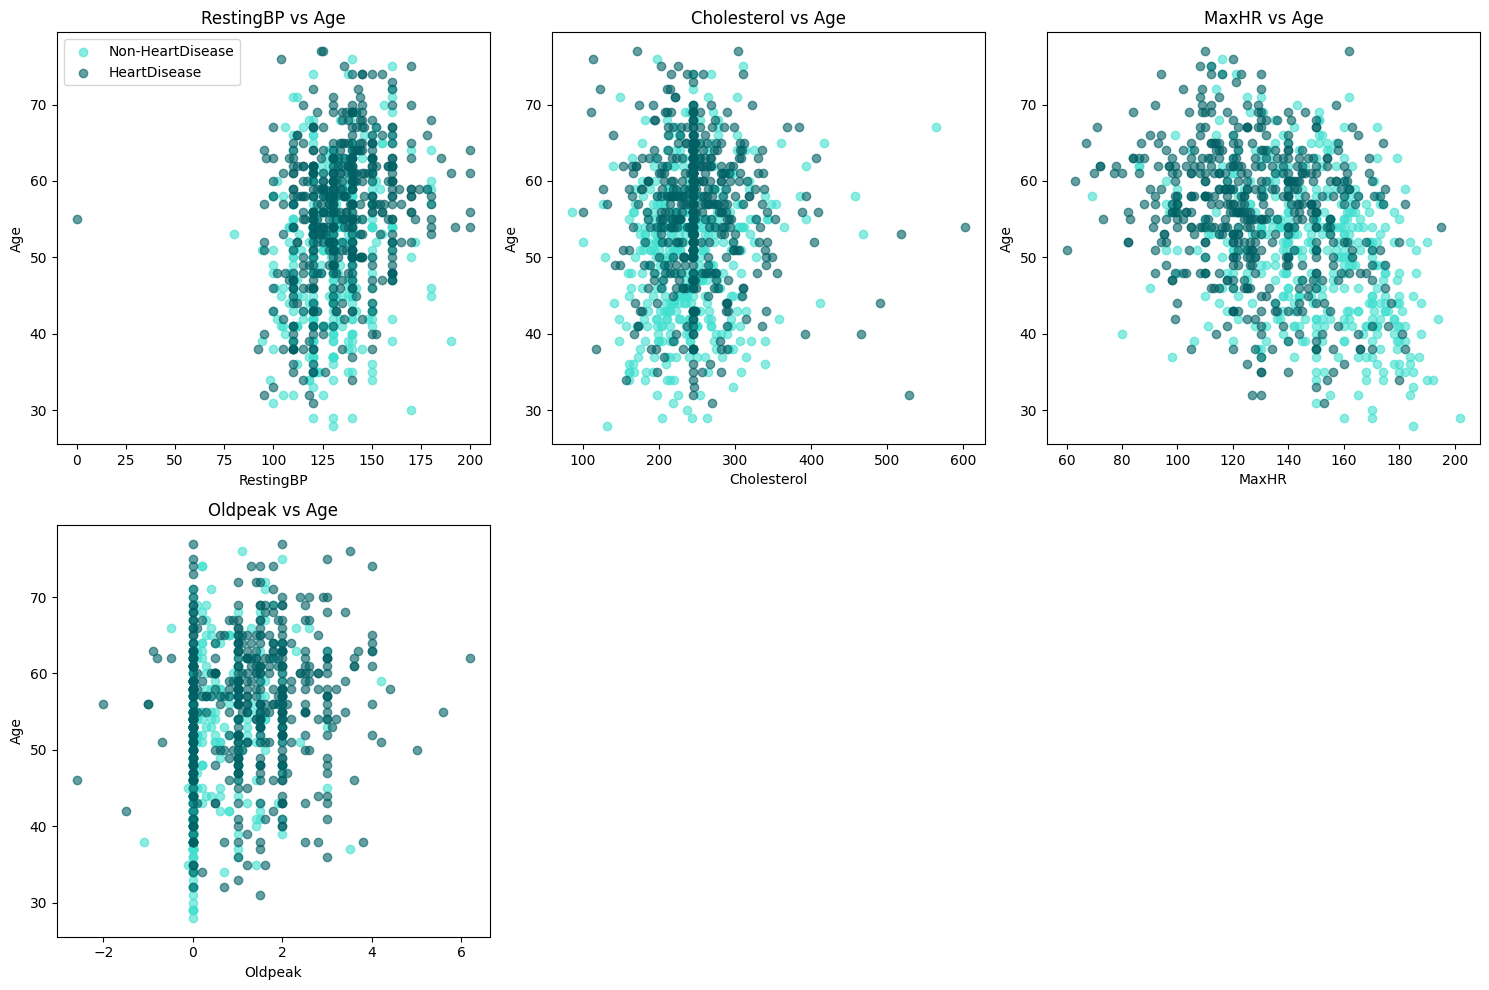

In [34]:
# Call the function to plot the scatter plots
labels = ['Non-HeartDisease', 'HeartDisease']
scatter_plots_grid_by_feature_and_split(df_heart, ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], 'HeartDisease', 'Age', labels)

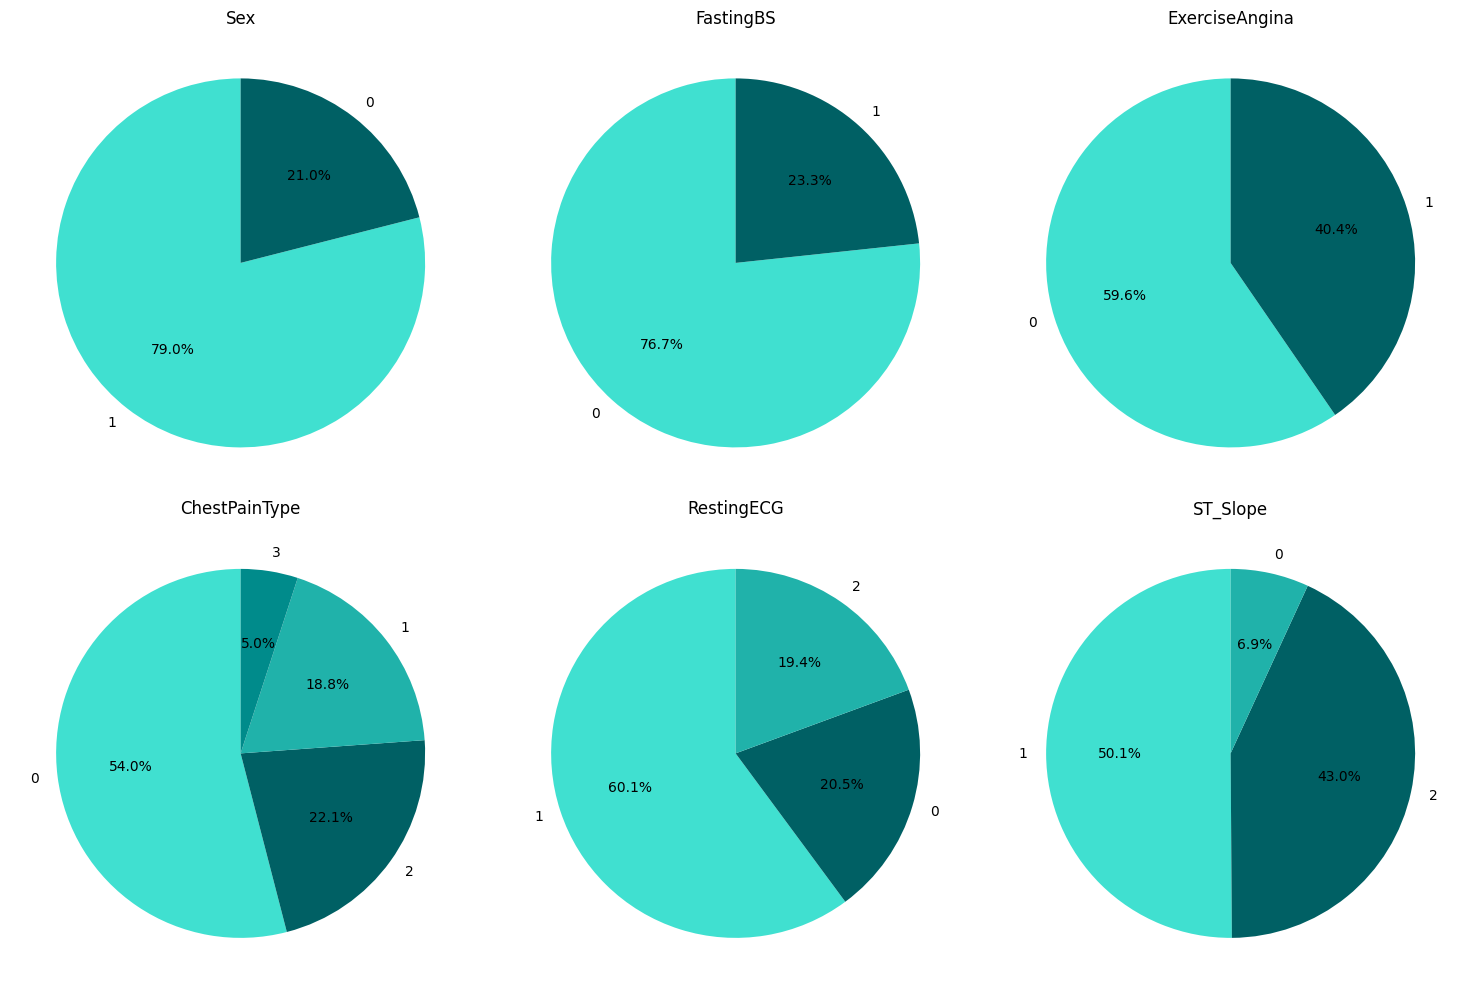

In [35]:
columns_to_plot = ['Sex', 'FastingBS', 'ExerciseAngina', 'ChestPainType', 'RestingECG', 'ST_Slope']
colors = ['#40E0D0', '#006064', '#20B2AA', '#008B8B'] 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))


axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
    value_counts = df_heart[column].value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(value_counts)])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

Con los resultados obtenidos, se muestra que las personas con enfermedades cardiovasculares tienden a estar dispersos entre todo el diagrama, esto puede indicar que la edad realmente no es un factor influyente para clasificar si una persona puede padecer o no de una enfermedad cardiovascular. En las columnas *ChestPainType*, *RestingECG* y *St_Slope*, es un poco más fácil de evidenciar que en su mayoría corresponden a persona que sí padecen de estas enfermadades y que estas es su mayoría se concentran en los mismo valores encontrados en los gráficos anteriores.

Con esto se concluye con el análisis del segundo dataset y con esto se puede proceder a la implementación de los modelos KNN, Regresión Lineal y Redes Neuronales para finalmente poder realizar las comparaciones solicitadas.

### Hipótesis
Una vez concluidos los análisis de ambos *datasets*, se procede a buscar una hipótesis para cada uno. Del mismo modo, el equipo decidio comprobar una tercera hipótesis sobre la comparación de los resultados obtenidos con cada modelo para los dos conjuntos de datos.
- **Hipótesis 1:** La edad es un factor determinante a la hora de clasificar si una mujer es diabética o no, sin importar los demás *features* evaluados.
- **Hipótesis 2:** Los tres algoritmos tendrán dificultades para clasificar correctamente a los pacientes cuando solamente se consideren las características relacionadas al *dataset Heart Failure Prediction Dataset*, como los resultados del *ST_Slope* y los resultados del *Resting_ECG*.
- **Hipótesis 3:** El modelo de las redes neuronales tendrá las mejores métricas de los tres algoritmos aplicado en cualquiera de los dos *datasets*.

### Preprocesamiento de datos
En esta sección se procede a realizar el preprocesamiento de datos para el dataset *Heart Failure Prediction Dataset*. Que consiste en separar el set de datos en training (80%) y testing (20%).

In [36]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
random_seed = 42

# Split the dataframe into training and testing sets
train_df, test_df = train_test_split(df_heart, test_size=0.2, random_state=random_seed)

# Print the shapes of the training and testing sets
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (734, 12)
Testing set shape: (184, 12)


## Implementación del modelo Regresión Logistica
### Dataset _Pima Indians Diabetes Database_


Primero se ejecutará el modelo con el *dataset* sin modificaciones. Luego, se normalizará el *dataset* y se ejecuta el nuevo modelo normalizado. Por último, se estandariza el *dataset* y se vuelve a ejecutar esta vez estandarizado. Estas 3 pruebas distintas permitirán ver el comportamiento del modelo con diferentes modificaciones al dataset.

In [36]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.xticks([0.5, 1.5], ['Non-diabetic', 'Diabetic'])
    plt.yticks([0.5, 1.5], ['Non-diabetic', 'Diabetic'])
    plt.show()

In [47]:
def print_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

**Dataset Original** <br>
Aquí se realiza la prueba con el dataset original, los resultados no son los más óptimos.

Dataset Original:
Accuracy: 0.76
Precision: 0.70
Recall: 0.53


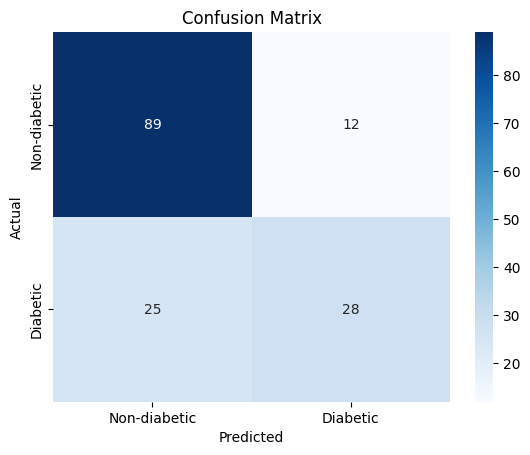

In [48]:
X_train = train_df.drop('Outcome', axis=1)
y_train = train_df['Outcome']
X_test = test_df.drop('Outcome', axis=1)
y_test = test_df['Outcome']

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

# Train model
log_reg.fit(X_train, y_train)

# Predictions with testing set
y_pred = log_reg.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Dataset Original:")
print_metrics(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

**Dataset Original normalizado**<br>
Aquí se normaliza el *dataset* original, los resultados empeoran un poco.

Dataset Original con Normalización:
Accuracy: 0.74
Precision: 0.69
Recall: 0.45


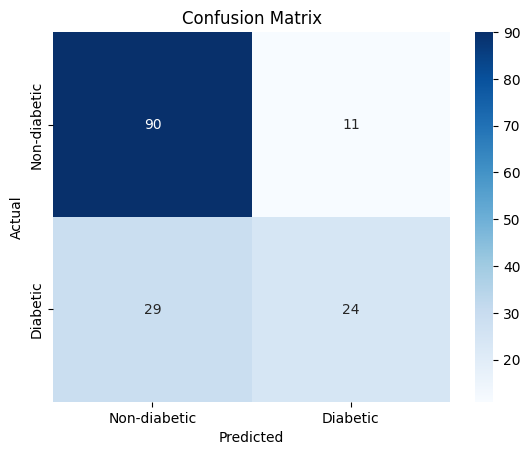

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

# Train 
log_reg_norm = LogisticRegression(max_iter=1000)
log_reg_norm.fit(X_train_norm, y_train)

# Predictions
y_pred_norm = log_reg_norm.predict(X_test_norm)

accuracy_norm = accuracy_score(y_test, y_pred_norm)
precision_norm = precision_score(y_test, y_pred_norm)
recall_norm = recall_score(y_test, y_pred_norm)

print("Dataset Original con Normalización:")
print_metrics(y_test, y_pred_norm)
plot_confusion_matrix(y_test, y_pred_norm)


**Dataset Original Estandarizado**<br>
Aquí se estandariza el *dataset* original, los resultados son mejores que son la normalización pero siguen siendo peor que con el original sin modificaciones.


Dataset Original con Estandarización:
Accuracy: 0.75
Precision: 0.69
Recall: 0.51


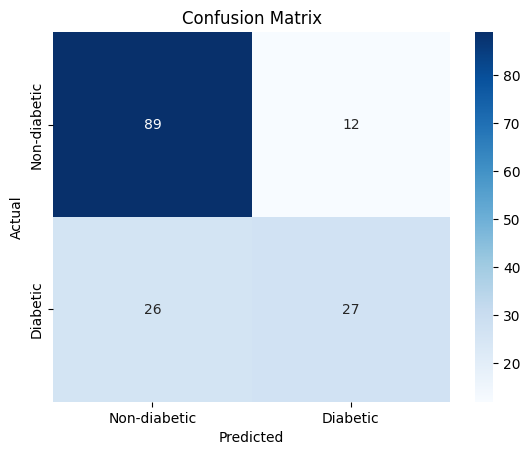

In [50]:
from sklearn.preprocessing import StandardScaler

# Standardize
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Train 
log_reg_std = LogisticRegression(max_iter=1000)
log_reg_std.fit(X_train_std, y_train)

# Predictions
y_pred_std = log_reg_std.predict(X_test_std)

accuracy_std = accuracy_score(y_test, y_pred_std)
precision_std = precision_score(y_test, y_pred_std)
recall_std = recall_score(y_test, y_pred_std)

print("\nDataset Original con Estandarización:")
print_metrics(y_test, y_pred_std)
plot_confusion_matrix(y_test, y_pred_std)


En busca de mejores métricas, se procede a eliminar la columna *Pregnancies* debido a que en el histógrama realizado en la exploración del *dataset* se evidencia que no es relevante para la clasificación. Primero se ejecutará el modelo con el *dataset* sin la columna *Pregnancies*. Luego, se normalizará el *dataset* sin la columna *Pregnancies* y se ejecuta el nuevo modelo normalizado. Por último, se estandariza el *dataset* sin la columna *Pregnancies* y se vuelve a ejecutar esta vez estandarizado. Estas 3 pruebas distintas permitirán ver el comportamiento del modelo con diferentes modificaciones al dataset sin la columna *Pregnancies*. La idea es obtener mejores resultados que con las 3 pruebas anteriores.

**Dataset sin columna pregnancies**<br>
Aquí se realiza la prueba con el dataset sin la columna *Pregnancies*, los resultados se mantienen igual a la última prueba realizada.

Dataset Original sin la columna Pregnancies:
Accuracy: 0.75
Precision: 0.69
Recall: 0.51


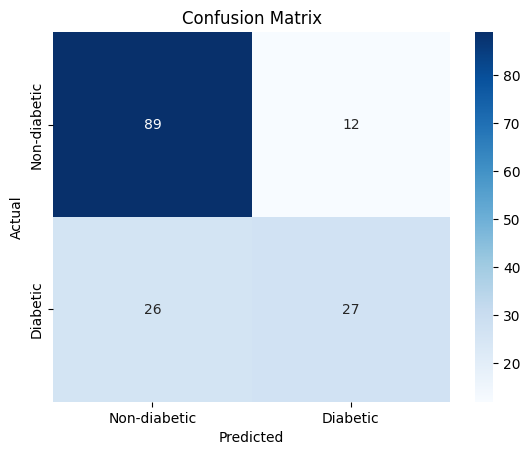

In [52]:
# Delete column 'Pregnancies' 
X_train_no_preg = X_train.drop('Pregnancies', axis=1)
X_test_no_preg = X_test.drop('Pregnancies', axis=1)

# Train without column 'Pregnancies' 
log_reg_no_preg = LogisticRegression(max_iter=1000)
log_reg_no_preg.fit(X_train_no_preg, y_train)
y_pred_no_preg = log_reg_no_preg.predict(X_test_no_preg)

print("Dataset Original sin la columna Pregnancies:")
print_metrics(y_test, y_pred_no_preg)
plot_confusion_matrix(y_test, y_pred_no_preg)


**Dataset sin columna pregnancies Normalizado**<br>
Aquí se normaliza el *dataset* original sin la colunna *Pregnancies*, los resultados empeoran un poco en recall pero mejoran en precision.


Dataset Original sin la columna Pregnancies Normalizado:
Accuracy: 0.75
Precision: 0.71
Recall: 0.45


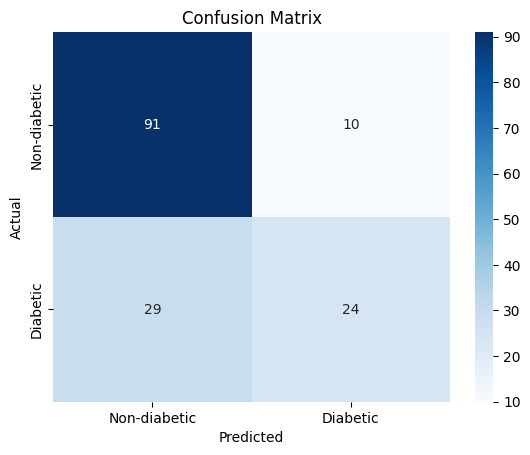

In [54]:
# Normalize without column 'Pregnancies'
scaler_norm_no_preg = MinMaxScaler()
X_train_no_preg_norm = scaler_norm_no_preg.fit_transform(X_train_no_preg)
X_test_no_preg_norm = scaler_norm_no_preg.transform(X_test_no_preg)

# Train dataset normalized without column 'Pregnancies'
log_reg_no_preg_norm = LogisticRegression(max_iter=1000)
log_reg_no_preg_norm.fit(X_train_no_preg_norm, y_train)
y_pred_no_preg_norm = log_reg_no_preg_norm.predict(X_test_no_preg_norm)

print("\nDataset Original sin la columna Pregnancies Normalizado:")
print_metrics(y_test, y_pred_no_preg_norm)
plot_confusion_matrix(y_test, y_pred_no_preg_norm)


**Dataset sin columna pregnancies Estandarizado**<br>
Aquí se estandariza el *dataset* original sin la colunna *Pregnancies*, los resultados mejoran en todas las métricas.


Dataset Original sin la columna Pregnancies Estandarizado:
Accuracy: 0.77
Precision: 0.72
Recall: 0.53


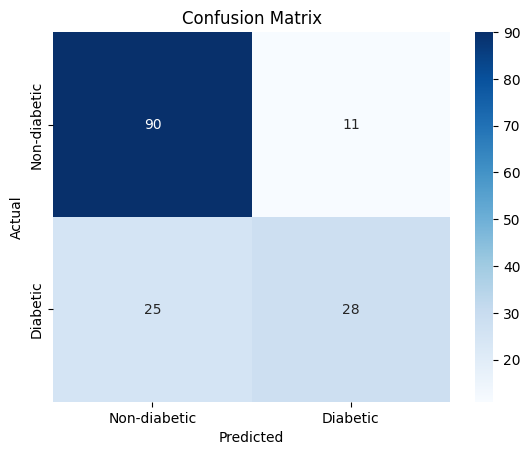

In [55]:
# Standardize without column 'Pregnancies'
scaler_std_no_preg = StandardScaler()
X_train_no_preg_std = scaler_std_no_preg.fit_transform(X_train_no_preg)
X_test_no_preg_std = scaler_std_no_preg.transform(X_test_no_preg)

# Train Standardized without column 'Pregnancies'
log_reg_no_preg_std = LogisticRegression(max_iter=1000)
log_reg_no_preg_std.fit(X_train_no_preg_std, y_train)
y_pred_no_preg_std = log_reg_no_preg_std.predict(X_test_no_preg_std)

print("\nDataset Original sin la columna Pregnancies Estandarizado:")
print_metrics(y_test, y_pred_no_preg_std)
plot_confusion_matrix(y_test, y_pred_no_preg_std)


Continuando en la búsqueda de mejores métricas, se procede a mantener la eliminación de la columna *Pregnancies* y además quitar los *outliers*. Primero se ejecutará el modelo con el *dataset* sin la columna *Pregnancies* y sin *outliers*. Luego, se normalizará el *dataset* sin la columna *Pregnancies* y sin *outliers* y se ejecuta el nuevo modelo normalizado. Por último, se estandariza el *dataset* sin la columna *Pregnancies* y sin *outliers* y se vuelve a ejecutar esta vez estandarizado. Estas 3 pruebas distintas permitirán ver el comportamiento del modelo con diferentes modificaciones al dataset sin la columna *Pregnancies* y sin *outliers*. La idea es obtener mejores resultados que con las pruebas anteriores.

**Dataset sin columna pregnancies y sin outliers**<br>
Aquí se realiza la prueba con el dataset sin la columna *Pregnancies* y sin *outliers*, los resultados mejoran considerablemente en comparación a las pruebas anteriores.

Dataset Original sin la columna Pregnancies y sin Outliers:
Accuracy: 0.81
Precision: 0.71
Recall: 0.67


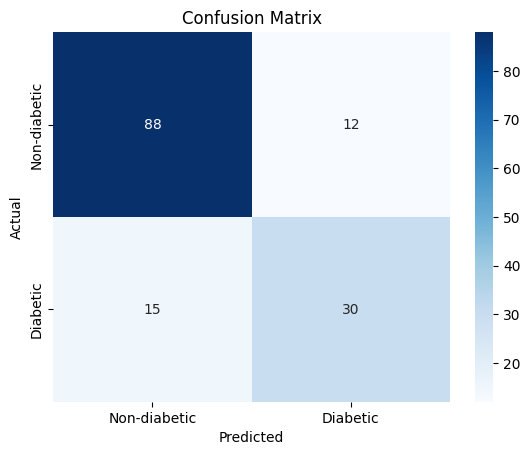

In [56]:
from scipy import stats

# Quitar outliers
z_scores = np.abs(stats.zscore(df_diabetes.drop(['Pregnancies', 'Outcome'], axis=1)))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_no_outliers_only = df_diabetes[~outliers]

X_no_outliers_only = df_no_outliers_only.drop(['Pregnancies', 'Outcome'], axis=1)
y_no_outliers_only = df_no_outliers_only['Outcome']

X_train_no_outliers_only, X_test_no_outliers_only, y_train_no_outliers_only, y_test_no_outliers_only = train_test_split(X_no_outliers_only, y_no_outliers_only, test_size=0.2, random_state=random_seed)

log_reg_no_outliers_only = LogisticRegression(max_iter=1000)
log_reg_no_outliers_only.fit(X_train_no_outliers_only, y_train_no_outliers_only)
y_pred_no_outliers_only = log_reg_no_outliers_only.predict(X_test_no_outliers_only)

print("Dataset Original sin la columna Pregnancies y sin Outliers:")
print_metrics(y_test_no_outliers_only, y_pred_no_outliers_only)
plot_confusion_matrix(y_test_no_outliers_only, y_pred_no_outliers_only)

**Dataset sin columna pregnancies y sin outliers Normalizado**<br>
Aquí se realiza la prueba con el dataset sin la columna *Pregnancies* y sin *outliers* normalizado, los resultados mejoran en cuanto a la precision pero empeoran el recall.

Dataset Original sin la columna Pregnancies y sin Outliers normalizado: 
Accuracy: 0.81
Precision: 0.76
Recall: 0.56


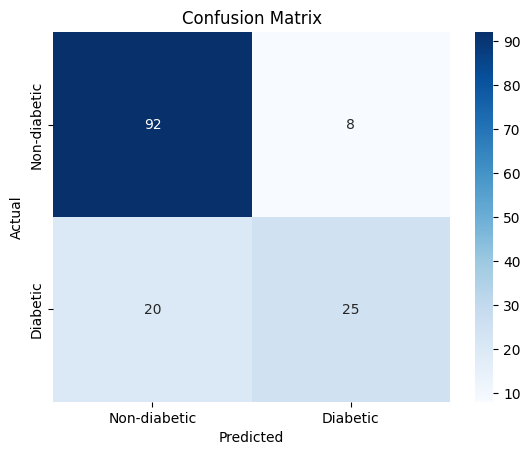

In [57]:
scaler_norm_no_outliers_preg = MinMaxScaler()
X_train_norm_no_outliers_preg = scaler_norm_no_outliers_preg.fit_transform(X_train_no_outliers_only)
X_test_norm_no_outliers_preg = scaler_norm_no_outliers_preg.transform(X_test_no_outliers_only)

log_reg_norm_no_outliers_preg = LogisticRegression(max_iter=1000)
log_reg_norm_no_outliers_preg.fit(X_train_norm_no_outliers_preg, y_train_no_outliers_only)
y_pred_norm_no_outliers_preg = log_reg_norm_no_outliers_preg.predict(X_test_norm_no_outliers_preg)

print("Dataset Original sin la columna Pregnancies y sin Outliers normalizado: ")
print_metrics(y_test_no_outliers_only, y_pred_norm_no_outliers_preg)
plot_confusion_matrix(y_test_no_outliers_only, y_pred_norm_no_outliers_preg)

**Dataset sin columna pregnancies y sin outliers Estandarizado**<br>
Aquí se realiza la prueba con el dataset sin la columna *Pregnancies* y sin *outliers* estandarizado, los resultados mejoran en cuanto al recall pero empeoran la precision.


Dataset Original sin la columna Pregnancies y sin Outliers estandarizado:
Accuracy: 0.81
Precision: 0.71
Recall: 0.67


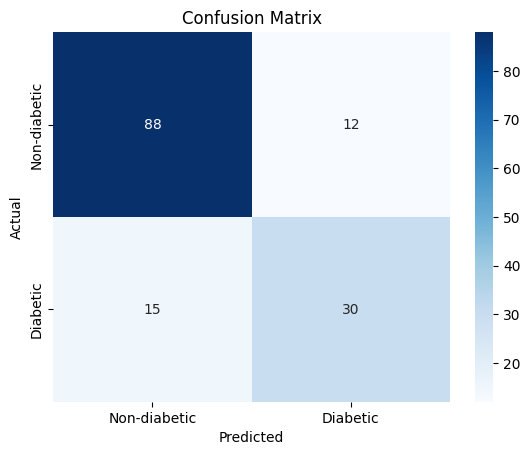

In [59]:
scaler_std_no_outliers_preg = StandardScaler()
X_train_std_no_outliers_preg = scaler_std_no_outliers_preg.fit_transform(X_train_no_outliers_only)
X_test_std_no_outliers_preg = scaler_std_no_outliers_preg.transform(X_test_no_outliers_only)

log_reg_std_no_outliers_preg = LogisticRegression(max_iter=1000)
log_reg_std_no_outliers_preg.fit(X_train_std_no_outliers_preg, y_train_no_outliers_only)
y_pred_std_no_outliers_preg = log_reg_std_no_outliers_preg.predict(X_test_std_no_outliers_preg)

print("\nDataset Original sin la columna Pregnancies y sin Outliers estandarizado:")
print_metrics(y_test_no_outliers_only, y_pred_std_no_outliers_preg)
plot_confusion_matrix(y_test_no_outliers_only, y_pred_std_no_outliers_preg)

Continuando en la búsqueda de mejores métricas, se procede a mantener la eliminación de la columna *Pregnancies* y los *outliers*, pero está vez haciendo un sobremuestreo para balancear el dataset. Primero se ejecutará el modelo con el *dataset* sin la columna *Pregnancies* y *outliers* con sobremuestreo. Luego, se normalizará el *dataset* sin la columna *Pregnancies* y *outliers* con sobremuestreo y se ejecuta el nuevo modelo normalizado. Por último, se estandariza el *dataset* sin la columna *Pregnancies* y *outliers* con sobremuestreo y se vuelve a ejecutar esta vez estandarizado. Estas 3 pruebas distintas permitirán ver el comportamiento del modelo con diferentes modificaciones al dataset sin la columna *Pregnancies* y *outliers* y con sobremuestreo. La idea es obtener mejores resultados que con las pruebas anteriores.

**Dataset sin columna pregnancies, sin outliers, con Sobremuestreo**<br>
Aquí se realiza la prueba con el dataset sin la columna *Pregnancies* y *outliers* y con sobremuestreo, los resultados son interesantes porque aunque el accuracy vuelve a bajar, el recall y precision suben considerablemente y se convierte en la mejor opción hasta el momento.

Dataset Original sin la columna Pregnancies, sin Outliers con sobremuestreo:
Accuracy: 0.75
Precision: 0.76
Recall: 0.71


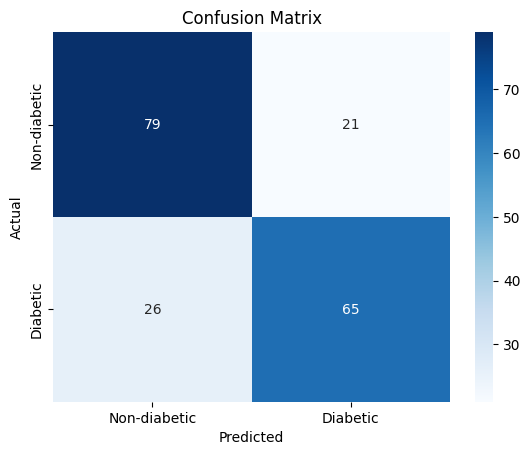

In [60]:
from imblearn.over_sampling import SMOTE

# SMOTE 
smote_no_preg_out = SMOTE(random_state=random_seed)
X_smote_no_preg_out, y_smote_no_preg_out = smote_no_preg_out.fit_resample(X_no_outliers_only, y_no_outliers_only)

X_train_smote_no_preg_out, X_test_smote_no_preg_out, y_train_smote_no_preg_out, y_test_smote_no_preg_out = train_test_split(X_smote_no_preg_out, y_smote_no_preg_out, test_size=0.2, random_state=random_seed)

log_reg_smote_no_preg_out = LogisticRegression(max_iter=1000)
log_reg_smote_no_preg_out.fit(X_train_smote_no_preg_out, y_train_smote_no_preg_out)
y_pred_smote_no_preg_out = log_reg_smote_no_preg_out.predict(X_test_smote_no_preg_out)

print("Dataset Original sin la columna Pregnancies, sin Outliers con sobremuestreo:")
print_metrics(y_test_smote_no_preg_out, y_pred_smote_no_preg_out)
plot_confusion_matrix(y_test_smote_no_preg_out, y_pred_smote_no_preg_out)


**Dataset sin columna pregnancies, sin outliers, con Sobremuestreo normalizado**<br>
Aquí se realiza la prueba con el dataset sin la columna *Pregnancies* y *outliers* y con sobremuestreo normalizado, los resultados mejoran en accuracy y recall pero baja un poco en precision.


Dataset Original sin la columna Pregnancies, sin Outliers con sobremuestreo normalizado:
Accuracy: 0.76
Precision: 0.75
Recall: 0.74


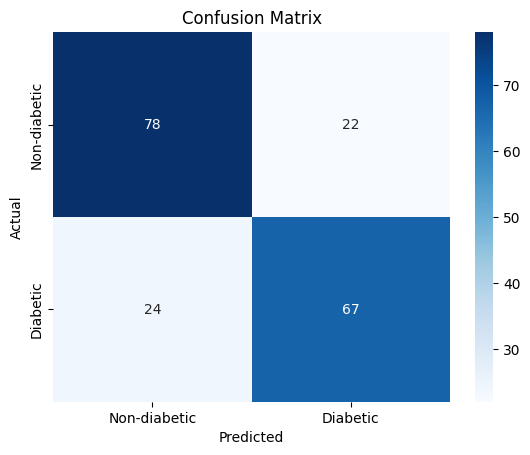

In [61]:
scaler_norm_smote_no_preg_out = MinMaxScaler()
X_train_norm_smote_no_preg_out = scaler_norm_smote_no_preg_out.fit_transform(X_train_smote_no_preg_out)
X_test_norm_smote_no_preg_out = scaler_norm_smote_no_preg_out.transform(X_test_smote_no_preg_out)

log_reg_norm_smote_no_preg_out = LogisticRegression(max_iter=1000)
log_reg_norm_smote_no_preg_out.fit(X_train_norm_smote_no_preg_out, y_train_smote_no_preg_out)
y_pred_norm_smote_no_preg_out = log_reg_norm_smote_no_preg_out.predict(X_test_norm_smote_no_preg_out)

print("\nDataset Original sin la columna Pregnancies, sin Outliers con sobremuestreo normalizado:")
print_metrics(y_test_smote_no_preg_out, y_pred_norm_smote_no_preg_out)
plot_confusion_matrix(y_test_smote_no_preg_out, y_pred_norm_smote_no_preg_out)


**Dataset sin columna pregnancies, sin outliers, con Sobremuestreo estandarizado**<br>
Aquí se realiza la prueba con el dataset sin la columna *Pregnancies* y *outliers* y con sobremuestreo estandarizado, los resultados mejoran en accuracy y precision pero baja un poco en recall. Se convierte en el nuevo mejor modelo hasta el momento.


Dataset Original sin la columna Pregnancies, sin Outliers con sobremuestreo estandarizado:
Accuracy: 0.77
Precision: 0.78
Recall: 0.73


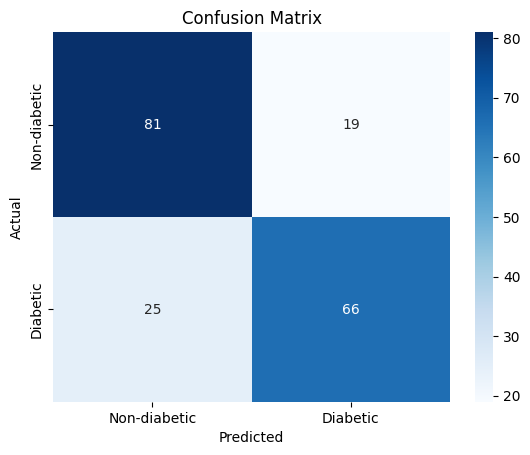

In [97]:
scaler_std_smote_no_preg_out = StandardScaler()
X_train_std_smote_no_preg_out = scaler_std_smote_no_preg_out.fit_transform(X_train_smote_no_preg_out)
X_test_std_smote_no_preg_out = scaler_std_smote_no_preg_out.transform(X_test_smote_no_preg_out)

log_reg_std_smote_no_preg_out = LogisticRegression(max_iter=1000)
log_reg_std_smote_no_preg_out.fit(X_train_std_smote_no_preg_out, y_train_smote_no_preg_out)
y_pred_std_smote_no_preg_out = log_reg_std_smote_no_preg_out.predict(X_test_std_smote_no_preg_out)


print("\nDataset Original sin la columna Pregnancies, sin Outliers con sobremuestreo estandarizado:")
print_metrics(y_test_smote_no_preg_out, y_pred_std_smote_no_preg_out)
plot_confusion_matrix(y_test_smote_no_preg_out, y_pred_std_smote_no_preg_out)


Lamnetablemente, a pesar de que el sobremeustreo fue súper beneficioso para el modelo de regresión logística, no lo fue para los demás modelos por loq ue se descarta su uso. La decisión final es mantener la eliminación de la columna *Pregnancies* y los *outliers* de manera estandarizada. <br>

Sin embargo, continuando en la búsqueda de mejores métricas para el modelo de regresión logística, se procede a buscar los mejores hiperparámetros para el modelo con el dataset ya elegido por el equipo de trabajo. Primero se probó con *scoring='accuracy'*.

**Dataset elegido con mejores hiperparámetros Accuracy**<br>
Aquí se realiza la prueba con el dataset elegido para buscar los mejores hiperparámetros, los resultados son similares al dataset elegido con la diferencia de que baja un poco el recall. Del mismo modo, se calcular la métrica AUC con el fin de saber cuál de los dos hiperparámetros buscados es el mejor para el caso en cuestión.

Mejores Hiperparámetros optimizando Accuracy: {'C': 1, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.81
Precision: 0.71
Recall: 0.67


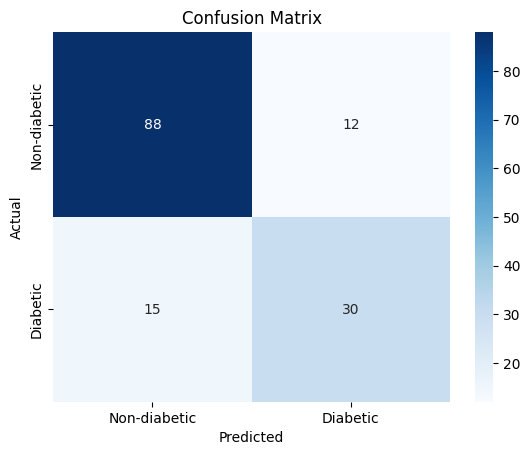

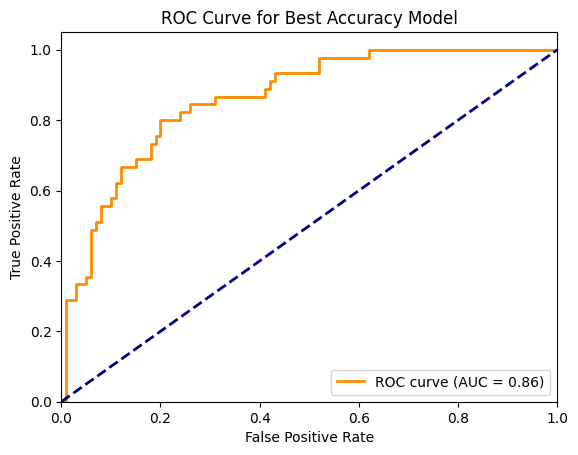

In [100]:
from sklearn.model_selection import GridSearchCV

# Parámetros extendidos para GridSearchCV
param_grid_extended = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False]
}

# Búsqueda de hiperparámetros con GridSearchCV optimizando la precisión
grid_search_acc_std_no_preg_out = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_extended,
    cv=5,
    scoring='accuracy'
)
grid_search_acc_std_no_preg_out.fit(X_train_std_no_outliers_preg, y_train_no_outliers_only)
best_params_acc_std_no_preg_out = grid_search_acc_std_no_preg_out.best_params_
best_model_acc_std_no_preg_out = grid_search_acc_std_no_preg_out.best_estimator_

# Predicciones y métricas con el mejor modelo para precisión
y_pred_best_acc_std_no_preg_out = best_model_acc_std_no_preg_out.predict(X_test_std_no_outliers_preg)
print("Mejores Hiperparámetros optimizando Accuracy:", best_params_acc_std_no_preg_out)
print_metrics(y_test_no_outliers_only, y_pred_best_acc_std_no_preg_out)
plot_confusion_matrix(y_test_no_outliers_only, y_pred_best_acc_std_no_preg_out)

# Calcular el AUC del mejor modelo para precisión
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores_acc = best_model_acc_std_no_preg_out.predict_proba(X_test_std_no_outliers_preg)[:, 1]
fpr_acc, tpr_acc, thresholds_acc = roc_curve(y_test_no_outliers_only, y_scores_acc)
roc_auc_acc = auc(fpr_acc, tpr_acc)

plt.figure()
plt.plot(fpr_acc, tpr_acc, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_acc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Accuracy Model')
plt.legend(loc="lower right")
plt.show()

Continuando en la búsqueda de los mejores hiperparámetros para el modelo con el dataset ya elegido por el equipo de trabajo, ahora se probará con *scoring='f1'*.

**Dataset elegido con mejores hiperparámetros F1 Score**<br>
Aquí se realiza la prueba con el dataset elegido para buscar los mejores hiperparámetros con F1 Score, los resultados se mantienen igual al anterior.

Mejores Hiperparámetros optimizando F1 Score: {'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.78
Precision: 0.61
Recall: 0.80


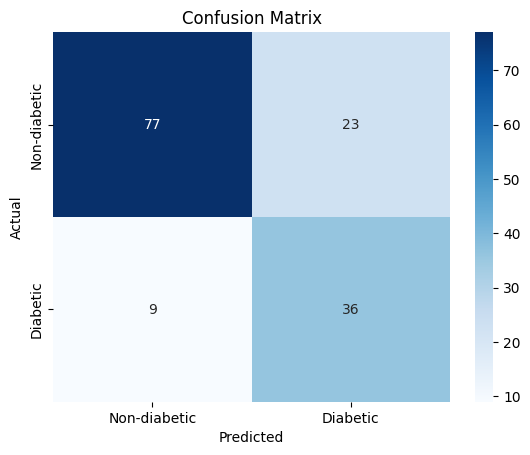

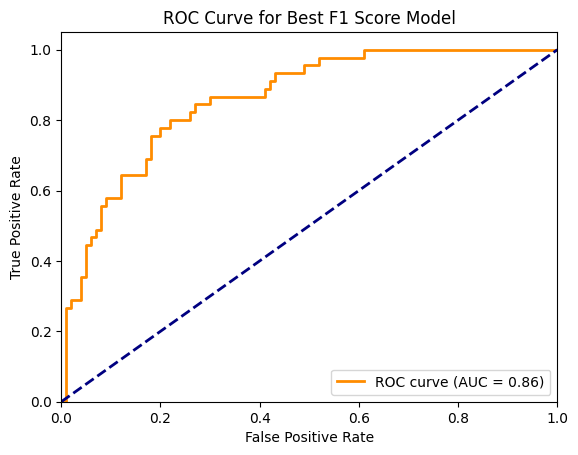

In [101]:
from sklearn.model_selection import GridSearchCV

# Parámetros extendidos para GridSearchCV
param_grid_extended = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False]
}

# Búsqueda de hiperparámetros con GridSearchCV optimizando el puntaje F1
grid_search_f1_std_no_preg_out = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_extended,
    cv=5,
    scoring='f1'
)
grid_search_f1_std_no_preg_out.fit(X_train_std_no_outliers_preg, y_train_no_outliers_only)
best_params_f1_std_no_preg_out = grid_search_f1_std_no_preg_out.best_params_
best_model_f1_std_no_preg_out = grid_search_f1_std_no_preg_out.best_estimator_

# Predicciones y métricas con el mejor modelo para el puntaje F1
y_pred_best_f1_std_no_preg_out = best_model_f1_std_no_preg_out.predict(X_test_std_no_outliers_preg)
print("Mejores Hiperparámetros optimizando F1 Score:", best_params_f1_std_no_preg_out)
print_metrics(y_test_no_outliers_only, y_pred_best_f1_std_no_preg_out)
plot_confusion_matrix(y_test_no_outliers_only, y_pred_best_f1_std_no_preg_out)

# Calcular el AUC del mejor modelo para el puntaje F1
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores_f1 = best_model_f1_std_no_preg_out.predict_proba(X_test_std_no_outliers_preg)[:, 1]
fpr_f1, tpr_f1, thresholds_f1 = roc_curve(y_test_no_outliers_only, y_scores_f1)
roc_auc_f1 = auc(fpr_f1, tpr_f1)

plt.figure()
plt.plot(fpr_f1, tpr_f1, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_f1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best F1 Score Model')
plt.legend(loc="lower right")
plt.show()

Cómo se puede observar, ambos hiperparámetros calculados dan el mismo AUC (0.86) lo que significa que ambos modelos pueden distinguir correctamente entre las clases. Es necesario saber que uno podría ser preferible cuando es importante maximizar la precisión total (*Accuracy*) y que el otro podría ser mejor cuando es más importante asegurar un buen equilibrio entre la captura de positivos (*Recall*) y la precisión de estas (*Precision*), lo cual es fundamental en situaciones donde los falsos negativos tienen un costo alto como lo es en el caso de diagnósticar a una persona con diabétes.<br>
 Por este motivo, el modelo elegido para el modelo de regresión logística en el *dataset* Pima Indians Diabetes Database es el que se obtuvo con el hiperparámetro F1.